<a href="https://colab.research.google.com/github/pathilink/programaria_analise_dados/blob/main/notebooks/analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Neste notebook, iremos explorar os dados coletados na pesquisa anual do DataHackers de 2022. A pesquisa do DataHackers é uma fonte valiosa de informações sobre o mercado de trabalho na área de Tecnologia da Informação (TI) no Brasil, abordando uma ampla gama de tópicos relevantes para profissionais, empresas e instituições de ensino.

A importância dessa pesquisa não pode ser subestimada, pois fornece insights cruciais sobre tendências, demandas e desafios enfrentados pelos profissionais de TI no Brasil. Além disso, a pesquisa contribui significativamente para o debate sobre diversidade no setor, incluindo questões de gênero, raça e outros aspectos relacionados à inclusão.

O objetivo desta análise de dados é duplo: em primeiro lugar, buscamos aprender a praticar técnicas de análise de dados utilizando Python e bibliotecas como pandas, matplotlib e seaborn. Em segundo lugar, pretendemos extrair insights importantes sobre o mercado de trabalho na área de TI, identificando padrões, tendências e correlações nos dados coletados.

Além de explorar aspectos como salários, níveis de escolaridade e tecnologias mais utilizadas, daremos um foco especial ao debate de diversidade, investigando questões de representatividade de gênero e raça no campo da tecnologia.

Vamos começar nossa jornada de exploração dos dados e descobertas!

# Importações

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency

# Uso da biblioteca Pandas

In [ ]:
# Montando o Driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lendo os dados
dados = pd.read_excel('/content/drive/MyDrive/PrograMaria/analise_dados/data/planilha_modulo3.xlsx', index_col=0)
dados.sample(3)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
3176,9ab0xe4mo9tbwaor99ab0nnrdd744bgl,18.0,17-21,Masculino,Branca,Não,NaN,NaN,True,Pernambuco (PE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3874,3fhyajntoblknfnm3fhyajxhmpqbjiln,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,Setor Alimentício,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19589.0
1990,jhvpc99fnq3x9jmgzjhvpc2pidj6wfew,30.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...","Velocidade de progressão de carreira, Atenção ...",True,São Paulo (SP),...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,14307.0


In [ ]:
dados.shape

(4271, 27)

In [ ]:
len(dados)

4271

In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4271 entries, 0 to 4270
Data columns (total 27 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         4271 non-null   object 
 1   IDADE                                                                                                                      4197 non-null   float64
 2   FAIXA IDADE                                                                                                                4271 non-null   object 
 3   GENERO                                                                                                                     4262 non-n

In [ ]:
dados.describe()

,IDADE,MUDOU DE ESTADO?,GESTOR?,SALARIO
count,4197.000000,4171.000000,3694.000000,3694.000000
mean,31.169168,0.806281,0.193016,10969.266919
std,6.902803,0.395258,0.394719,19419.753189
min,18.000000,0.000000,0.000000,35.000000
25%,26.000000,1.000000,0.000000,4269.500000
50%,30.000000,1.000000,0.000000,7625.500000
75%,35.000000,1.000000,0.000000,12778.500000
max,54.000000,1.000000,1.000000,485191.000000


# Repetindo análise do excel

In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
dados[dados['GENERO'] == 'Feminino']

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Bahia (BA),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio de Janeiro (RJ),...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,São Paulo (SP),...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
dados[dados['GENERO'] != 'Masculino']

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Bahia (BA),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio de Janeiro (RJ),...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,São Paulo (SP),...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
dados[dados['GENERO'].str.contains('não', na=False)]

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
562,vhuw8xnpbmj6oh20xovhuwcbdl4a12ni,29.0,25-29,Prefiro não informar,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,n2ktdn33istvlu1ha4v3kn2ktdn1rsp1,NaN,55+,Prefiro não informar,Indígena,Prefiro não informar,Não acredito que minha experiência profissiona...,NaN,True,NaN,...,Setor Público,de 51 a 100,0.0,NaN,Analista de Suporte/Analista Técnico,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,826.0
1913,k3as6jdh3w4jf4ztsw4kpkk3as6jdy19,30.0,30-34,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,11476.0
1925,jzppdwep2kpisqjjzppdh304v83cj7eu,NaN,17-21,Prefiro não informar,Prefiro não informar,Prefiro não informar,"Sim, acredito que minha experiência profission...",Quantidade de oportunidades de emprego/vagas r...,False,NaN,...,Setor Farmaceutico,de 1 a 5,0.0,NaN,Outra Opção,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2294.0
2554,f5l206z0hr9uh3nz2iiff5l206c0g10o,20.0,17-21,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Setor Público,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,1339.0
3090,a6ugmsw7s8hu5aa6uglio5apj74fam9o,26.0,25-29,Prefiro não informar,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Norte (RN),...,Educação,de 101 a 500,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,11545.0
3357,7q0icczxn0l3a894cbx7q0icczjyud0n,29.0,25-29,Prefiro não informar,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio de Janeiro (RJ),...,Tecnologia/Fábrica de Software,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,6345.0
3493,6m8haop6lxnaizpwij6m8haopiax98jg,25.0,25-29,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,São Paulo (SP),...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 3 a 4 anos,Menos de 1 ano,3900.0
3610,5mloglozmr0r715mntaxbt6xy8b5olmb,30.0,30-34,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Velocidade de progressão de carreira,True,São Paulo (SP),...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10174.0
4171,0rksyxnqhn13nwytwi6y0rkssx6jmodf,26.0,25-29,Prefiro não informar,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Outra Opção,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Menos de 1 ano,10517.0


In [ ]:
dados[dados['IDADE'] >= 30]

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Piauí (PI),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,Rio Grande do Sul (RS),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0
4264,028mfisr3mqazkn5n6swe028mt55nqzq,37.0,35-39,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,Tecnologia/Fábrica de Software,de 51 a 100,1.0,Gerente/Head,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 3 a 4 anos,Mais de 10 anos,24543.0


In [ ]:
dados[(dados['IDADE'] > 30) & (dados['GENERO'] == 'Feminino')]

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.0,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,São Paulo (SP),...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,7416.0
23,zuqfcwtl9unfc5ezuqfcwm8coytsp5ap,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio de Janeiro (RJ),...,Tecnologia/Fábrica de Software,de 501 a 1.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,de 5 a 6 anos,13418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,0gprow0ownrbfneftxf0gprow4kyrqdy,41.0,40-44,Feminino,Branca,Prefiro não informar,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,São Paulo (SP),...,Seguros ou Previdência,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,11452.0
4221,0fgi5bnb0u9b0fgc0jmqlbnvtu12b76d,34.0,30-34,Feminino,Outra,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Área de Consultoria,de 51 a 100,0.0,NaN,Outra Opção,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5687.0
4240,0a5xgxb1ljmuqn0un8a10a5xg4eufs2l,37.0,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,Sergipe (SE),...,Finanças ou Bancos,de 51 a 100,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Menos de 1 ano,1182.0
4247,07qzabp4ujpe4oz81udmb07qzabp4h0t,34.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,Setor de Energia,de 11 a 50,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,5925.0


📌 Que tal fazer um fitro para identificar pessoas que se declararam amarelas e outro de pessoas abaixo de 40 anos? E melhor, um filtro que misture ambos?😉



In [ ]:
dados[dados['COR/RACA/ETNIA'] == 'Amarela'].sample(3)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
340,xfuhlot18fn83duohbgd2xfuhloujkn5,23.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Setor Alimentício,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3941.0
170,yri3z491ejizlpj9ylu2k3jyri3z4915,34.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Varejo,Acima de 3.000,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,16650.0
2034,j5jx3nua5wq1sz9vwj5jx3nx4n18vh8k,33.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,14766.0


In [ ]:
dados[dados['IDADE'] < 40].sample(3)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
3118,9vq6f4ows2ms04r89vq3wmlctwcoplsf,39.0,35-39,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Pernambuco (PE),...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,5366.0
1582,mk9wadf5yqc73j8mk9urtwbmyhnnirkg,24.0,22-24,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Bahia (BA),...,Indústria,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos,Menos de 1 ano,6832.0
637,uuxxjbdhwqg7pgnehvjh4uuxxjb7ki6t,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,Santa Catarina (SC),...,Varejo,Acima de 3.000,0.0,NaN,Engenheiro de Machine Learning/ML Engineer,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,10697.0


In [ ]:
dados[(dados['COR/RACA/ETNIA'] == 'Amarela') & (dados['IDADE'] < 40)].sample(3)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
899,sm02panfken1k6uqnfusm02payxam3d5,29.0,25-29,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,b8ax0ebap3wk58guxm4axb8ax0ebb3lt,33.0,30-34,Masculino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,Minas Gerais (MG),...,Marketing,de 51 a 100,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Menos de 1 ano,15879.0
231,y7qu0mv77w6jcdomiuye3y7qu0mvf490,35.0,35-39,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,False,NaN,...,Indústria,de 101 a 500,0.0,NaN,Analista de Negócios/Business Analyst,Pleno,de R$ 16.001/mês a R$ 20.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,16720.0


📌 Baixe o arquivo licitacoes.csv e verifique quantas licitações estão com a “Situação Licitação” igual a “Encerrado”.

In [ ]:
licitacoes = pd.read_csv('/content/drive/MyDrive/PrograMaria/analise_dados/data/licitacoes.csv', delimiter=';', encoding='latin1')
licitacoes.sample(3)

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,UF,Município,Data Resultado Compra,Data Abertura,Valor Licitação
6909,572018,153063,UNIVERSIDADE FEDERAL DO PARA,5,Pregão,22943/2018,Objeto: Pregão Eletrônico - Aquisição com Forn...,Evento de Adiamento Publicado,26000,Ministério da Educação,26239,Universidade Federal do Pará,PA,BELEM,06/12/2018,09/10/2018,"3990719,1000"
7064,592018,150223,MATERNIDADE CLIMERIO DE OLIVEIRA,6,Dispensa de Licitação,23066067986201876,Objeto: Aquisição de materiais para instalação...,Encerrado,26000,Ministério da Educação,26232,Universidade Federal da Bahia,BA,SALVADOR,05/12/2018,NaN,"9999,6700"
14833,80382018,135025,EMBRAPA/CNPMA,6,Dispensa de Licitação,21187001958201894,Objeto: Aquisição de gases especiais para labo...,Encerrado,22000,Ministério da Agricultura e Pecuária,22202,Empresa Brasileira de Pesquisa Agropecuária,SP,JAGUARIUNA,05/12/2018,NaN,"48877,4500"


In [ ]:
licitacoes[licitacoes['Situação Licitação'] == 'Encerrado'].count()

,0
Número Licitação,9016
Código UG,9016
Nome UG,9016
Código Modalidade Compra,9016
Modalidade Compra,9016
Número Processo,9016
Objeto,9016
Situação Licitação,9016
Código Órgão Superior,9016
Nome Órgão Superior,9016


In [ ]:
licitacoes['Situação Licitação'].value_counts()

,count
Situação Licitação,
Encerrado,9016
Publicado,3709
Evento de Resultado de Julgame,1922
Retificação,127
Evento de Alteração Publicad,93
Evento de Suspensão Publicado,72
Anulação,67
Revogação,63
Divulgado,55


In [ ]:
dados.groupby('GENERO')['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12


In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
dados['GENERO'].value_counts(dropna=False)

,count
GENERO,
Masculino,3194
Feminino,1056
Prefiro não informar,12
NaN,9


In [ ]:
dados[dados['IDADE'] > 30]['NIVEL'].value_counts()

,count
NIVEL,
Sênior,525
Pleno,408
Júnior,274


In [ ]:
dados[(dados['IDADE'] > 30) & (dados['GENERO'] == 'Feminino')]['NIVEL'].value_counts()

,count
NIVEL,
Pleno,117
Sênior,114
Júnior,96


In [ ]:
pd.pivot_table(dados, values=['ID'], index=['GENERO'], columns=['GESTOR?'], aggfunc='count')

ID     
GESTOR?                0.0  1.0
GENERO                         
Feminino               754  132
Masculino             2212  578
Prefiro não informar     9    2

# Estatística Básica

In [ ]:
lista_idades = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23]

In [ ]:
np.sum(lista_idades)

328

In [ ]:
len(lista_idades)

11

In [ ]:
np.sum(lista_idades) / len(lista_idades)

29.818181818181817

In [ ]:
media = np.mean(lista_idades)
print("Média aritmética:", media)

Média aritmética: 29.818181818181817


In [ ]:
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43]

In [ ]:
lista_idades = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23, 100]
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43, 100]

In [ ]:
mediana = np.median(lista_idades)
mediana

30.5

Voltando para a tabela

In [ ]:
dados['IDADE'].mean()

31.169168453657374

In [ ]:
dados['IDADE'].median()

30.0

In [ ]:
dados['IDADE'].mode()

,IDADE
0,27.0


In [ ]:
dados['IDADE'].std()

6.902802832143122

In [ ]:
dados['IDADE'].min()

18.0

In [ ]:
dados['IDADE'].max()

54.0

In [ ]:
dados[dados['GENERO'] == 'Feminino']['IDADE'].mean()

31.318051575931232

In [ ]:
dados[dados['GENERO'] == 'Feminino']['SALARIO'].mean()

8673.22460496614

📌Que tal um desafio? Faça a média da idade de quem respondeu ser do gênero masculino, assim como as estatísticas da coluna de salário😉

In [ ]:
dados[dados['GENERO'] == 'Masculino']['IDADE'].mean()

31.147876077930373

In [ ]:
dados[dados['GENERO'] == 'Masculino']['SALARIO'].mean()

11724.552688172043

# Valores faltantes

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4271 entries, 0 to 4270
Data columns (total 27 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         4271 non-null   object 
 1   IDADE                                                                                                                      4197 non-null   float64
 2   FAIXA IDADE                                                                                                                4271 non-null   object 
 3   GENERO                                                                                                                     4262 non-n

### Trabalhando coluna gênero

In [ ]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
dados['GENERO'] = dados['GENERO'].fillna('Prefiro não informar')

dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


### Trabalhando coluna idade

In [ ]:
dados['IDADE'].isnull().value_counts()

,count
IDADE,
False,4197
True,74


In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [ ]:
media_17_21 = dados[dados['FAIXA IDADE'] == '17-21']['IDADE'].mean()
media_17_21

20.205479452054796

In [ ]:
dados.loc[(dados['FAIXA IDADE'] == '17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media_17_21

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68


In [ ]:
dados[dados['FAIXA IDADE'] == '55+']['IDADE']#.mean()

,IDADE
9,NaN
66,NaN
96,NaN
121,NaN
156,NaN
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
dados[dados['FAIXA IDADE'] == '55+']['NIVEL']

,NIVEL
9,Pleno
66,Júnior
96,Pleno
121,Pleno
156,Júnior
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
media_geral = dados['IDADE'].mean()
media_geral

31.153517220250375

In [ ]:
dados.loc[(dados['FAIXA IDADE'] == '55+') & (dados['IDADE'].isnull()), 'IDADE'] = media_geral

In [ ]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


### Trabalhando coluna salário

In [ ]:
dados[dados['SALARIO'].isnull()]

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,ztgepgj82o9oix0nztgepq2trcay6gpv,24.0,22-24,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,zsa9i6njd3e594mw0tvlk4zsa9iw86i9,24.0,22-24,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,zr4b2vm7dapp3linwqwn7zr4b2vmagqx,32.0,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Bahia (BA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,zm7o5yquakof0j6zm7vh3o0letznhdvh,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Rio de Janeiro (RJ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,09oxwp6lsdwhw09ox1uobuxa8cq2pzma,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4252,064pe9b1htw7mflhif064pe95dotv6yf,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Piauí (PI),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


In [ ]:
mediana_salario = dados['SALARIO'].median()

In [ ]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario

# Valores discrepantes (outliers)

In [ ]:
lista_idades = [26, 30, 32, 22, 26, 35, 400, 20, 43, 31, 23]

In [ ]:
media = np.mean(lista_idades)
media

62.54545454545455

In [ ]:
desvio = np.std(lista_idades)
desvio

106.89532997398872

In [ ]:
media + 3 * desvio

383.2314444674207

In [ ]:
media - 3 * desvio

-258.1405353765116

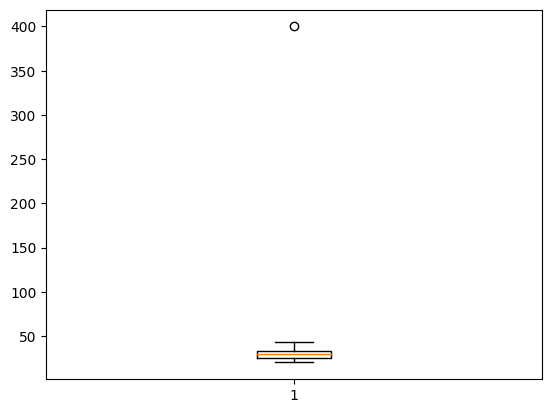

In [ ]:
plt.boxplot(lista_idades);

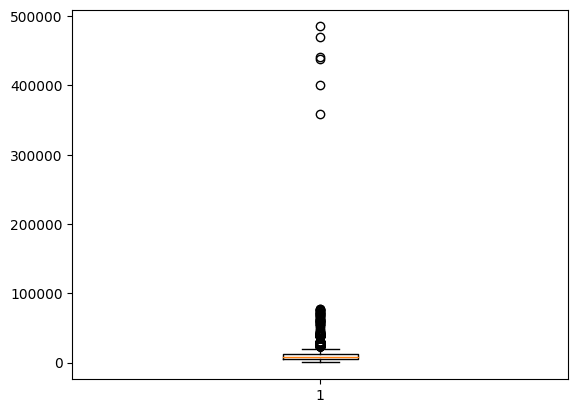

In [ ]:
plt.boxplot(dados['SALARIO']);

In [ ]:
q1 = dados['SALARIO'].quantile(0.25)
q1

4751.5

In [ ]:
q3 = dados['SALARIO'].quantile(0.75)
q3

11794.5

In [ ]:
iqr = q3 - q1
iqr

7043.0

In [ ]:
lim_superior = q3 + (1.5 * iqr)
lim_superior

22359.0

In [ ]:
lim_inferior = q1 - (1.5 * iqr)
lim_inferior

-5813.0

In [ ]:
dados['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


In [ ]:
media_salario = dados['SALARIO'].mean()
media_salario

10517.53348162023

In [ ]:
desvio_salario = dados['SALARIO'].std()
desvio_salario

18096.21098911858

In [ ]:
limite_superior = media_salario + (3 * desvio_salario)
limite_superior

64806.166448975964

In [ ]:
limite_inferior = media_salario - (3 * desvio_salario)
limite_inferior

-43771.0994857355

In [ ]:
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19
de R$ 30.001/mês a R$ 40.000/mês,3


In [ ]:
media_30_40 = dados[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO'] < limite_superior)]['SALARIO'].mean()
media_30_40

39002.19402985075

In [ ]:
dados.loc[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO'] > limite_superior), 'SALARIO'] = media_30_40

In [ ]:
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


In [ ]:
media_acima_40 = dados[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO'] < limite_superior)]['SALARIO'].mean()
print('Média acima de 40:', media_acima_40)

dados.loc[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO'] > limite_superior), 'SALARIO'] = media_acima_40

Média acima de 40: 53127.846153846156


In [ ]:
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


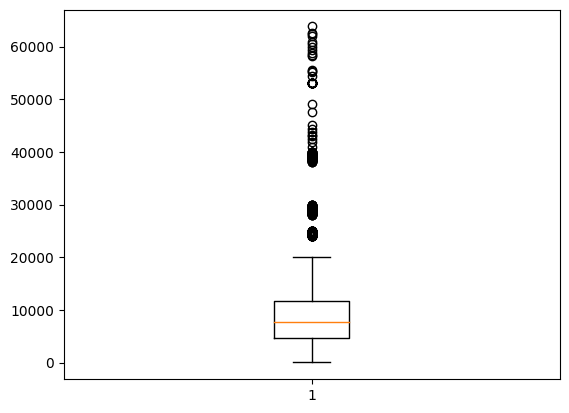

In [ ]:
plt.boxplot(dados['SALARIO']);

# Distribuição amostral e intervalo de confiança

In [ ]:
salarios = dados['SALARIO']

In [ ]:
media_amostral = np.mean(salarios)
media_amostral

9904.390109813306

In [ ]:
desvio_amostral = np.std(salarios)
desvio_amostral

8306.104872579352

In [ ]:
nivel_confianca = 0.95

In [ ]:
tamanho_amostra = len(salarios)
tamanho_amostra

4271

In [ ]:
erro_padrao = stats.sem(salarios)
erro_padrao

127.11109872023638

In [ ]:
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra - 1, loc=media_amostral, scale=erro_padrao)
intervalo_confianca

(9655.186295869078, 10153.593923757535)

# Featuring engineering

In [ ]:
def preencher_nivel(gestor, nivel):
  if gestor == 1:
    return "Pessoa Gestora"
  else:
    return nivel

In [ ]:
dados['NOVO_NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)

In [ ]:
dados['NOVO_NIVEL'].value_counts()

,count
NOVO_NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Pessoa Gestora,713


In [ ]:
dados = pd.get_dummies(dados, columns=['NIVEL'])

In [ ]:
def determinar_geracao(idade):
  if 39 < idade <= 58:
    return 'Geração X'
  elif 29 < idade <= 39:
    return 'Millenial'
  elif 13 < idade <= 29:
    return 'Geração Z'
  else:
    return 'Outra geração'

In [ ]:
dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [ ]:
dados['GERACAO'].value_counts()

,count
GERACAO,
Geração Z,1999
Millenial,1761
Geração X,511


In [ ]:
dados2 = pd.read_excel('/content/drive/MyDrive/PrograMaria/analise_dados/Planilha_Aula_parte2.xlsx')
dados2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [ ]:
dados = dados.merge(dados2, on='ID', how='left')
dados.sample(3)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
1383,oaq2shoyxut3yr7oaq2shpz0tomxm5xi,28.0,25-29,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Amazonas (AM),...,NaN,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Benefícios, Plano de carr...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,"Sim, ocorreram layoffs/demissões em massa na e...",Análise de Dados,"SQL, Python"
3382,7jivsflmw07g1lc7zvdr27jivsfllqwr,44.0,40-44,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buscando oportunidade na área de dados,NaN
1143,qmb7sr5as3ezqmb3gqyl342q6inua31u,29.0,25-29,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buscando oportunidade na área de dados,NaN


In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua e

In [ ]:
dados['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [ ]:
dados['EM_BUSCA'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)
dados['EM_BUSCA'].value_counts()

,count
EM_BUSCA,
False,2332
True,1364


In [ ]:
dados['ABERTO_OPORTUNIDADES'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)
dados['ABERTO_OPORTUNIDADES'].value_counts()

,count
ABERTO_OPORTUNIDADES,
False,2342
True,1354


In [ ]:
def determinar_etnia(etnia):
  if etnia == 'Branca':
    return 'Branca'
  elif etnia == 'Outra' or etnia == 'Prefiro não informar':
    return 'Outra'
  else:
    return 'Não branca'

📌Com base no que aprendemos nas aulas de Featuring engineering, crie uma nova coluna de Etnia - brancas, não branca e outras😊

In [ ]:
dados['ETNIA'] = dados['COR/RACA/ETNIA'].apply(determinar_etnia)
dados['ETNIA'].value_counts()

,count
ETNIA,
Branca,2746
Não branca,1484
Outra,43


# Correlação

In [ ]:
correlacao_continua = dados['IDADE'].corr(dados['SALARIO'])
correlacao_continua

0.2902441968622099

In [ ]:
def cramer_coeficiente(coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [ ]:
cramer_coeficiente(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])

0.04499106580480143

In [ ]:
pd.crosstab(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])


NIVEL DE ENSINO,Doutorado ou Phd,Estudante de Graduação,Graduação/Bacharelado,Mestrado,Não tenho graduação formal,Prefiro não informar,Pós-graduação
COR/RACA/ETNIA,,,,,,,
Amarela,7,15,50,14,2,0,40
Branca,127,365,999,355,65,8,827
Indígena,0,2,4,2,0,0,3
Outra,0,0,6,3,1,0,7
Parda,50,178,333,113,33,3,344
Prefiro não informar,1,2,14,1,0,1,7
Preta,6,51,104,33,9,0,88


In [ ]:
np.array(pd.crosstab(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO']))

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

📌Que tal um desafio? Faça a correlação entre nível de ensino e gênero😁

In [ ]:
cramer_coeficiente(dados['GENERO'], dados['NIVEL DE ENSINO'])

0.076119232802818

# Salvar dados

In [ ]:
# dados.to_csv('/content/drive/MyDrive/PrograMaria/analise_dados/analise_dados.csv', index=False)

# Conectando SQL com Pandas

In [ ]:
import sqlite3

In [ ]:
# Cria conexão com o banco de dados importado no Drive
conexao = sqlite3.connect('/content/drive/MyDrive/PrograMaria/analise_dados/status_brasil')

In [ ]:
# consulta
query = 'SELECT * FROM municipios_brasileiros mb WHERE cidade = "Itaquaquecetuba";'
query

'SELECT * FROM municipios_brasileiros mb WHERE cidade = "Itaquaquecetuba";'

In [ ]:
pd.read_sql(query, con=conexao)

,cidade,estado,regiao,municipio_id
0,Itaquaquecetuba,SP,Sudeste,5043


In [ ]:
query = '''SELECT	mb.estado, AVG(ms.renda)
        FROM municipios_brasileiros mb
        INNER JOIN municipio_status ms
          on mb.municipio_id = ms.municipio_id
        GROUP BY 1;'''

pd.read_sql(query, con=conexao)

,estado,AVG(ms.renda)
0,AC,0.585455
1,AL,0.548363
2,AM,0.545113
3,AP,0.618875
4,BA,0.574805
5,CE,0.559293
6,DF,0.863000
7,ES,0.680628
8,GO,0.683980
9,MA,0.531664


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/PrograMaria/analise_dados/analise_dados.csv')

In [ ]:
lista_estados = list(dados['UF ONDE MORA'].unique())
lista_estados

['DF',
 'PA',
 'MG',
 'CE',
 'SP',
 'RS',
 'BA',
 'RJ',
 'MS',
 'PB',
 'MT',
 'PR',
 'ES',
 nan,
 'SC',
 'PE',
 'RN',
 'SE',
 'AL',
 'GO',
 'MA',
 'AM',
 'PI']

In [ ]:
query = '''SELECT	mb.estado, AVG(ms.renda)
        FROM municipios_brasileiros mb
        INNER JOIN municipio_status ms
          on mb.municipio_id = ms.municipio_id
        WHERE mb.estado IN ({})
        GROUP BY 1;'''.format(', '.join(['?' for _ in lista_estados]))

estados_renda = pd.read_sql(query, con=conexao, params=lista_estados)
estados_renda

,estado,AVG(ms.renda)
0,AL,0.548363
1,AM,0.545113
2,BA,0.574805
3,CE,0.559293
4,DF,0.863000
5,ES,0.680628
6,GO,0.683980
7,MA,0.531664
8,MG,0.652008
9,MS,0.687846


In [ ]:
# renomeia a coluna
dados.rename(columns={'UF ONDE MORA':'estado'}, inplace=True)

In [ ]:
# merge com o resultado anterior
dados = dados.merge(estados_renda, on='estado', how='left')

In [ ]:
correlacao_renda_salario = dados['SALARIO'].corr(dados['AVG(ms.renda)'])
correlacao_renda_salario

0.12083384881429592

📌Faça a mesma análise utilizando o índice de educação. Existe alguma correlação com salário?🤔

In [ ]:
query = '''SELECT	mb.estado, AVG(ms.educacao)
        FROM municipios_brasileiros mb
        INNER JOIN municipio_status ms
          on mb.municipio_id = ms.municipio_id
        WHERE mb.estado IN ({})
        GROUP BY 1;'''.format(', '.join(['?' for _ in lista_estados]))

estados_educacao = pd.read_sql(query, con=conexao, params=lista_estados)
estados_educacao

,estado,AVG(ms.educacao)
0,AL,0.442745
1,AM,0.436935
2,BA,0.481942
3,CE,0.552120
4,DF,0.742000
5,ES,0.591359
6,GO,0.596167
7,MA,0.488622
8,MG,0.556862
9,MS,0.557410


In [ ]:
dados = dados.merge(estados_educacao, on='estado', how='left')

In [ ]:
dados['SALARIO'].corr(dados['AVG(ms.educacao)'])

0.15558020288268712

# Visualização de dados

In [ ]:
genero_counts = dados['GENERO'].value_counts()
genero_counts

,count
GENERO,
Masculino,3194
Feminino,1058
Prefiro não informar,21


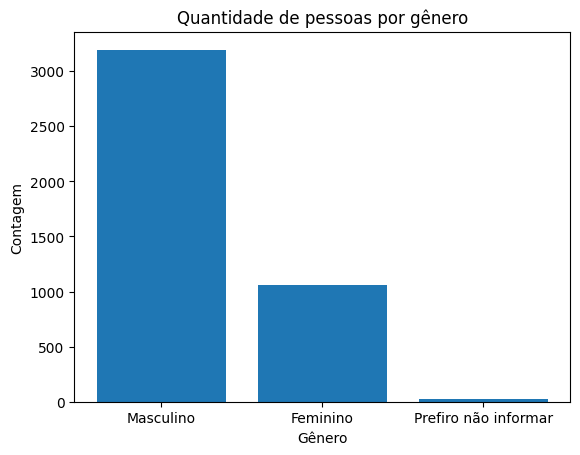

In [ ]:
plt.figure()
plt.bar(height=genero_counts.values, x = genero_counts.index)
plt.title('Quantidade de pessoas por gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

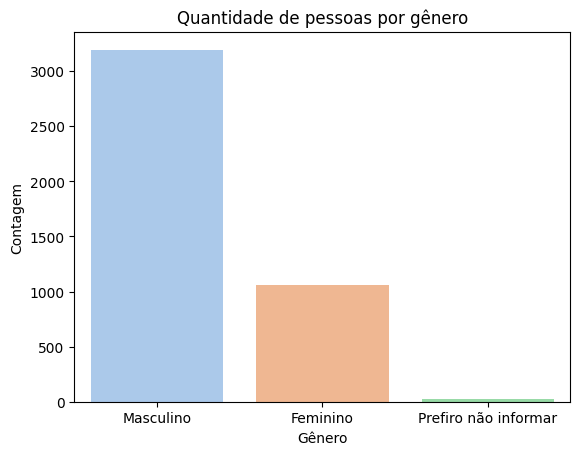

In [ ]:
plt.figure()
sns.countplot(data=dados, x='GENERO', hue='GENERO', palette='pastel')
plt.title('Quantidade de pessoas por gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
# plt.grid(True)
plt.show()

In [ ]:
salario_por_idade = dados.groupby('IDADE')['SALARIO'].mean()
salario_por_idade

,SALARIO
IDADE,
18.000000,4230.307692
19.000000,4519.590909
20.000000,5004.272727
20.205479,3536.000000
21.000000,4578.737179
22.000000,4394.689815
23.000000,5602.406897
24.000000,6151.622449
25.000000,7616.392336


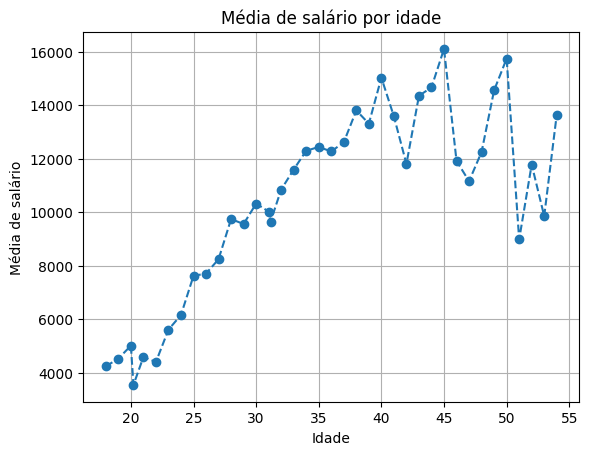

In [ ]:
plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values, marker='o', linestyle='--')
plt.xlabel('Idade')
plt.ylabel('Média de salário')
plt.title('Média de salário por idade')
plt.grid(True)
plt.show()

In [ ]:
fig = px.line(salario_por_idade.reset_index(),
              x='IDADE',
              y='SALARIO',
              title='Média de salário por idade',
              markers=True)
fig.show()

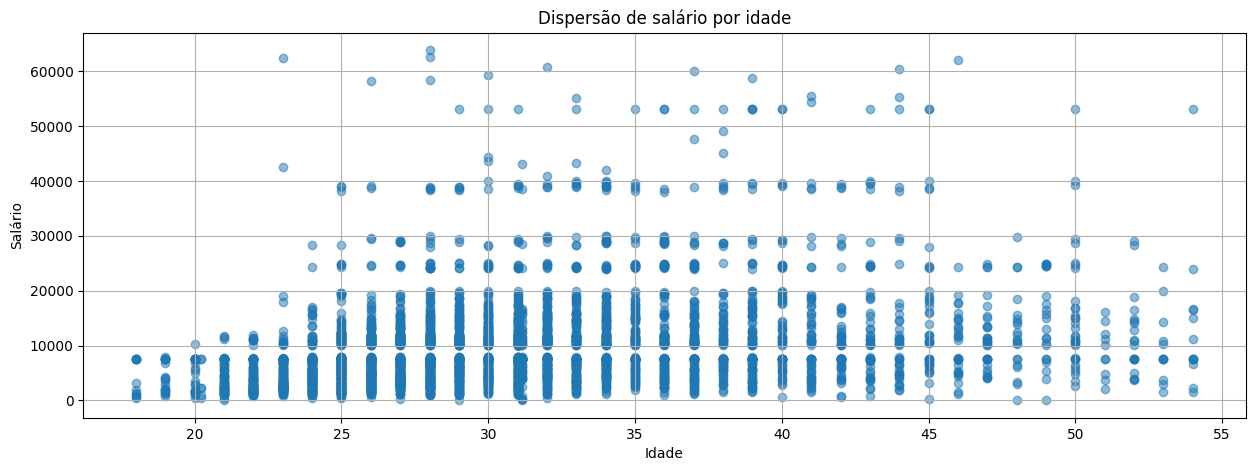

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(dados['IDADE'], dados['SALARIO'], alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.title('Dispersão de salário por idade')
plt.grid(True)
# plt.show()

In [ ]:
fig = px.scatter(dados,
                x='IDADE',
                y='SALARIO',
                title='Dispersão de salário por idade',
                )
fig.show()